# Team 4
Stephen Crocker, Jack Moss, Martin Wu

In [1]:
import sys
assert sys.version_info >= (3, 5)
import time
import warnings
import os
import math

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model

import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

#Options and parameters.
dataFileName = "country_vaccinations.csv"

#Load the file using pandas
df = pd.read_csv(dataFileName)
print(df.head())

#Establish the helper functions
def showDescriptiveStats(dataFrame, featureName):
    print(featureName, " | set stats: ")
    print(dataFrame[featureName].describe())
    print('\n')
    return None

#Establish the helper functions
def clearNullsWithMean(dataFrame, featureName):
    dataFrame[featureName].fillna(dataFrame[featureName].mean(), inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None

def clearNullsWithZero(dataFrame, featureName):
    dataFrame[featureName].fillna(0, inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None


       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

# Descriptive Statistics and Data Cleaning

In [2]:
#Setup the feature lists
features = list(df.columns)
featuresWithData = [
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
]

#Convert dates into the date type and then into the integer type.
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.value)
#print(df['date'])

#Display descriptive statistics of the data set after cleaning it:
for feat in featuresWithData:
    clearNullsWithMean(df, feat)
    showDescriptiveStats(df, feat)

#Split the data set into a train and test set.
train_df, test_df = train_test_split(df,shuffle = True, test_size = 0.75, random_state=17)


date  | set stats: 
count    1.566600e+04
mean     1.615655e+18
std      2.878672e+15
min      1.607904e+18
25%      1.613606e+18
50%      1.616026e+18
75%      1.618013e+18
max      1.620259e+18
Name: date, dtype: float64


total_vaccinations  | set stats: 
count    1.566600e+04
mean     3.162541e+06
std      1.698504e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.083450e+04
75%      7.412198e+05
max      2.977340e+08
Name: total_vaccinations, dtype: float64


people_vaccinated  | set stats: 
count    1.566600e+04
mean     1.845545e+06
std      9.366755e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.195700e+04
75%      4.656932e+05
max      1.494623e+08
Name: people_vaccinated, dtype: float64


people_fully_vaccinated  | set stats: 
count    1.566600e+04
mean     6.940189e+05
std      4.727014e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.616225e+04
max      1.089266e+08
Name: people_fully_vaccinated, dtype: float64


daily_va

# Correlations

In [3]:
#Clean the set of nulls/NaNs
clearNullsWithMean(df, 'date')
clearNullsWithZero(df, 'people_vaccinated')

#Show the correlation of all attributes
print('Pearsons correlations:')
for x in featuresWithData:
    for y in featuresWithData:
        if y != x:
            corr, _ = pearsonr(df[x], df[y])
            print(x, 'vs', y + ':', corr)
    print()

    

Pearsons correlations:
date vs total_vaccinations: 0.12650587185115278
date vs people_vaccinated: 0.1141315469210973
date vs people_fully_vaccinated: 0.10884266382000019
date vs daily_vaccinations_raw: 0.08096198738689848
date vs daily_vaccinations: 0.07847997708644176
date vs total_vaccinations_per_hundred: 0.2674901158844547
date vs people_vaccinated_per_hundred: 0.2589431400158587
date vs people_fully_vaccinated_per_hundred: 0.22489697090022154
date vs daily_vaccinations_per_million: 0.11622273750906519

total_vaccinations vs date: 0.12650587185115278
total_vaccinations vs people_vaccinated: 0.7829166496712407
total_vaccinations vs people_fully_vaccinated: 0.752827375296542
total_vaccinations vs daily_vaccinations_raw: 0.8669117262164019
total_vaccinations vs daily_vaccinations: 0.910094217096963
total_vaccinations vs total_vaccinations_per_hundred: 0.19220451406471062
total_vaccinations vs people_vaccinated_per_hundred: 0.16929897564070026
total_vaccinations vs people_fully_vaccina

# Linear Regression Scatterplot

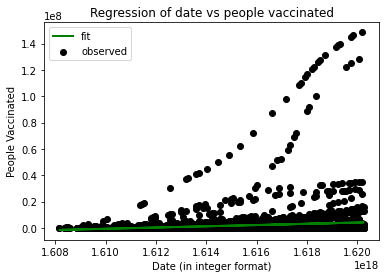

R-Squared:  0.016529172872882913


In [4]:
x = train_df['date']

#Reshape the Y set.
y = train_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)
#print(x2)

#Load the linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(x2, y)

#Create and show the scatter plot
plt.scatter(x2, y, color='black', label='observed')
plt.plot(x2, model.predict(x2), label='fit', color='Green', linewidth=2)
plt.xlabel('Date (in integer format)')
plt.ylabel('People Vaccinated')
plt.title('Regression of date vs people vaccinated')
plt.legend(loc='best')
plt.show()

#display the R-Squared score
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)


# Boxplot of Various Attributes

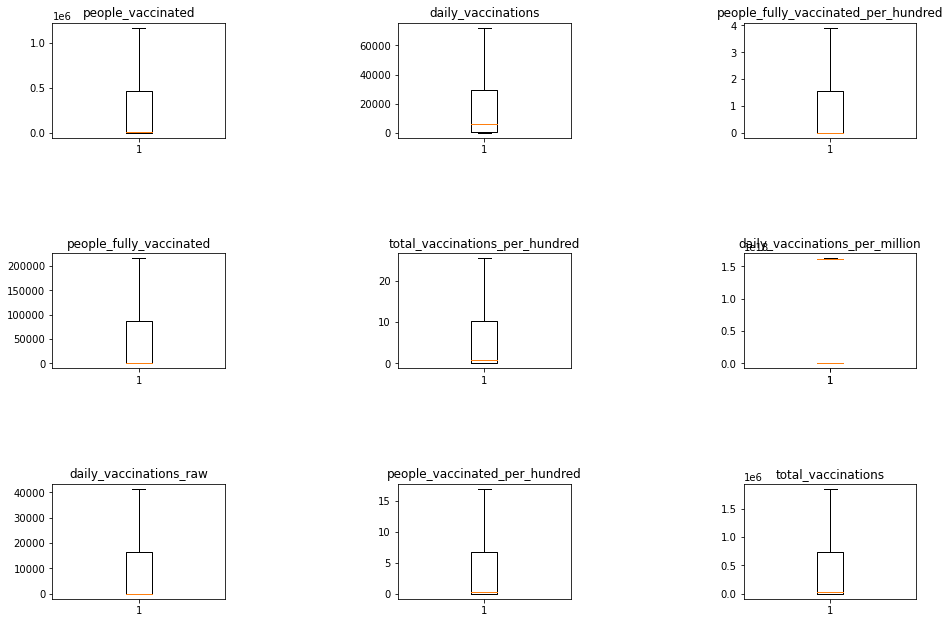

In [5]:
#Display boxplots
figRowCount = 3
figColCount = math.floor(len(featuresWithData) / figRowCount)
fig, axs = plt.subplots(figRowCount, figColCount)
xAxis = 0
yAxis = -1
for dataset in featuresWithData:
    xAxis = (xAxis + 1) % figRowCount
    if xAxis == 0:
        yAxis += 1
    axs[xAxis, yAxis].boxplot(df[dataset], autorange = True, showfliers = False)
    axs[xAxis, yAxis].set_title(dataset)

fig.subplots_adjust(left=0, right=1.5, bottom=0, top=1, hspace=1, wspace=1) #adjust fig for increased spacing
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show() #Show the boxplots


# PairPlots

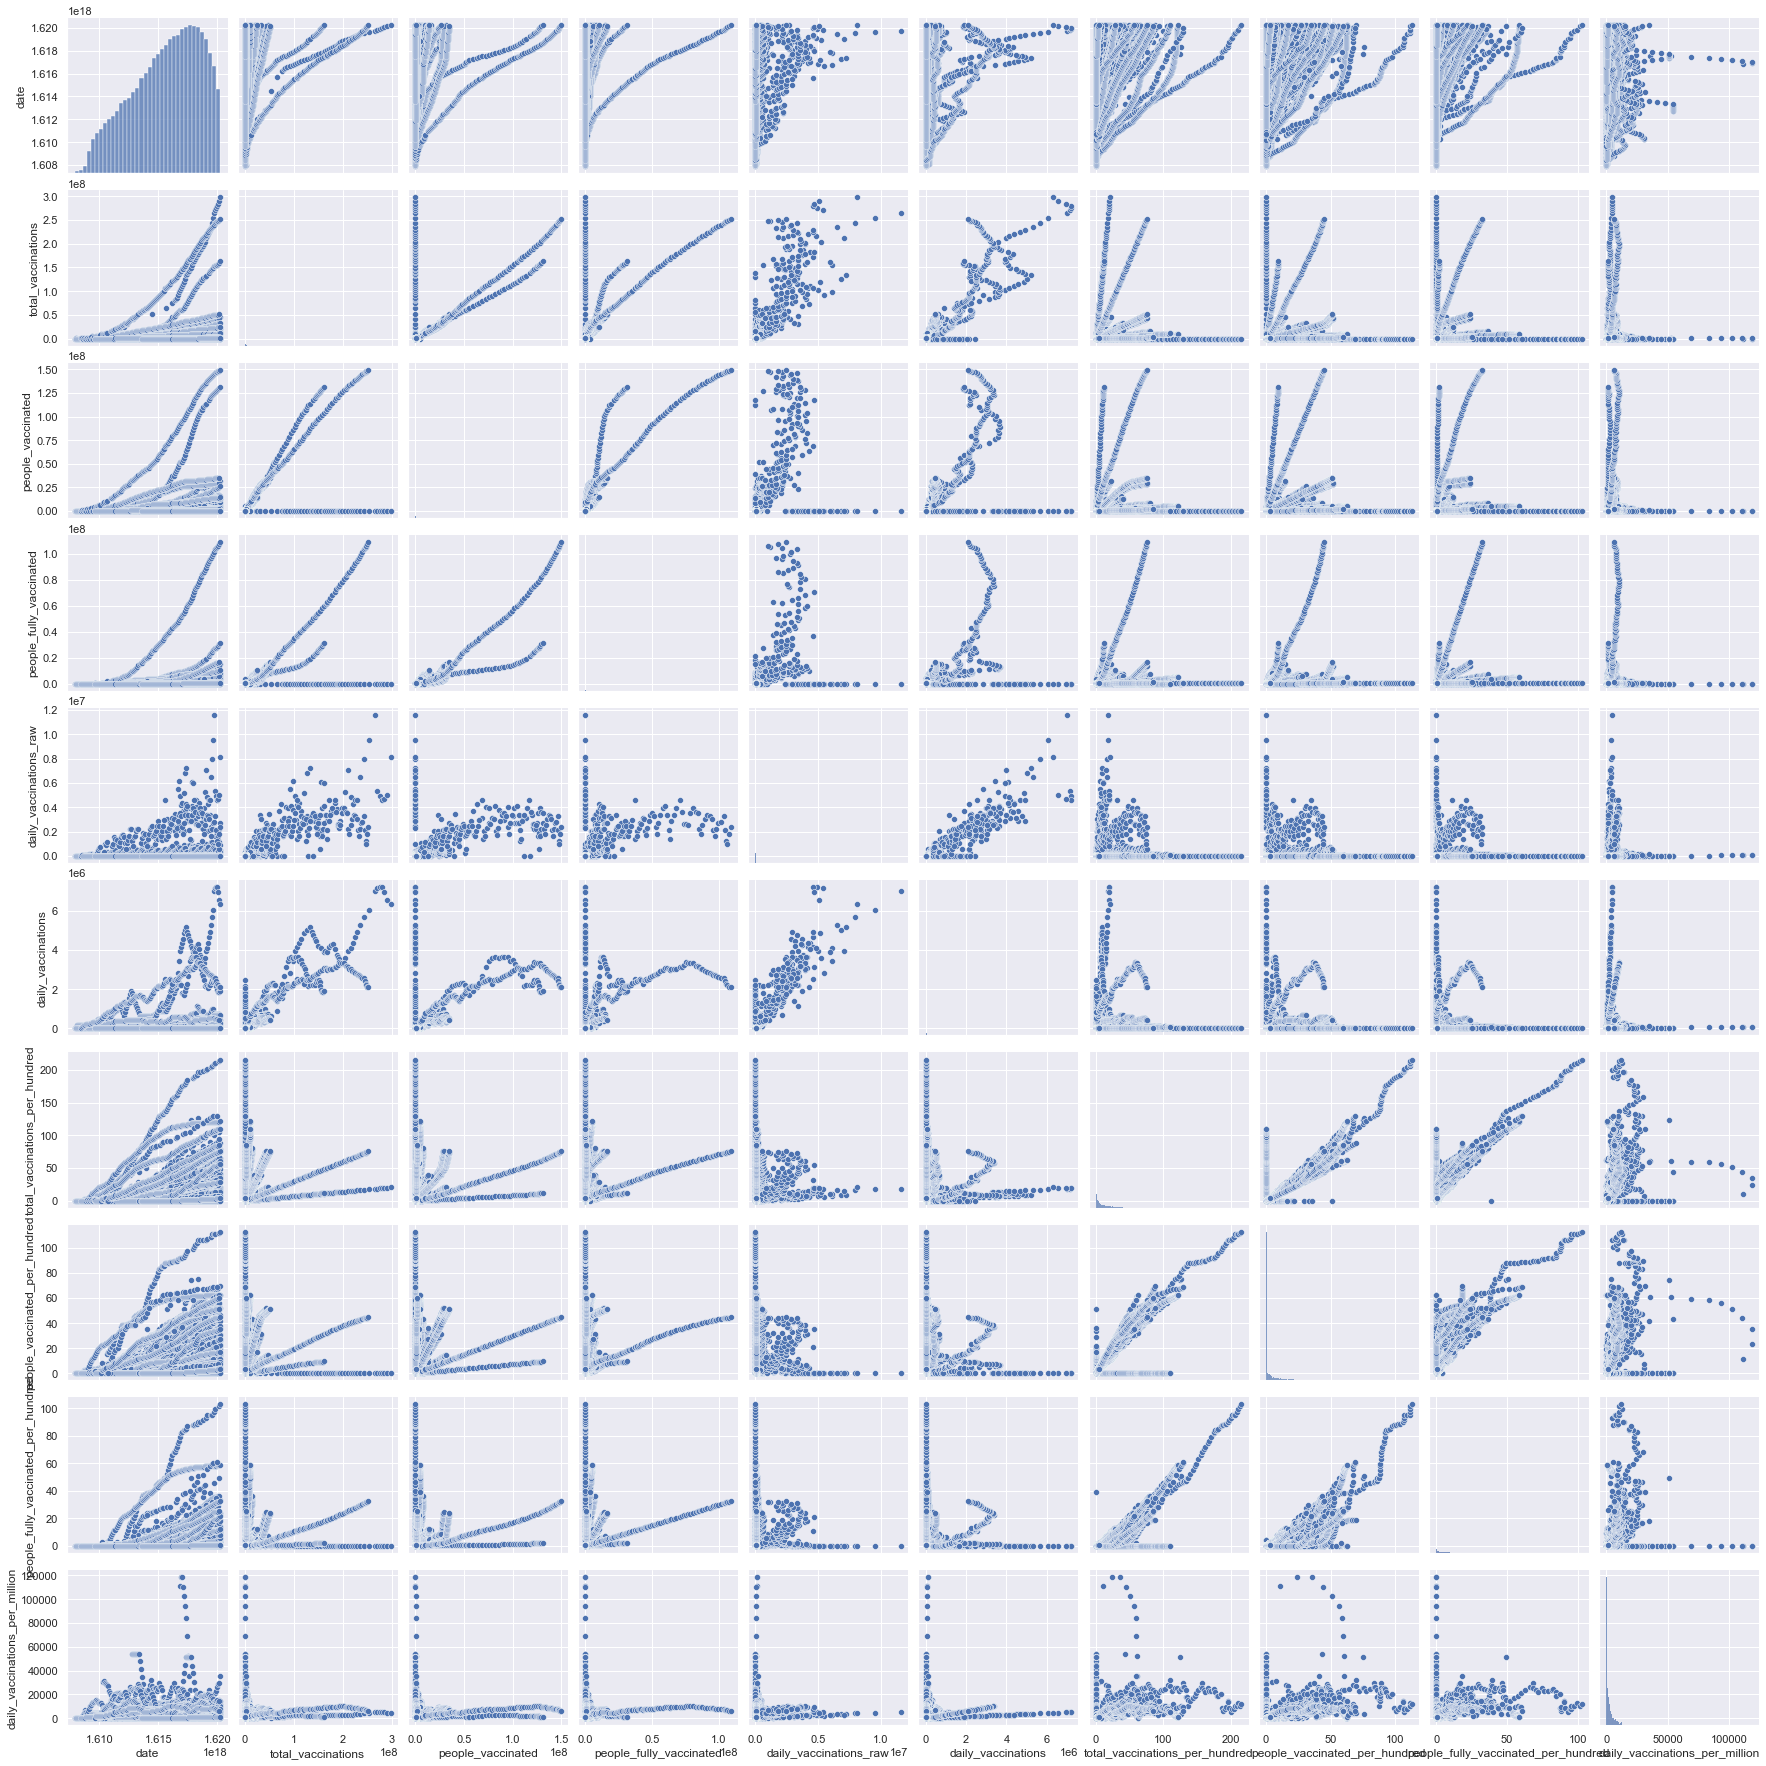

In [6]:
#Display pairplots
sns.set()
sns.pairplot(df[featuresWithData]) #show pairplots

# R2 Score vs Correlation

In [7]:
#Obtain the test dataset r_sq
x = test_df['date']
y = test_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)

#Display the R-Squared score again
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)

#Show the correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation, from test data, people_vaccinated vs date: ', corr)

#Show the difference between them
diff = r_sq - corr
percentDiff = (diff / corr) * 100
print("Difference: ", diff)
print("Percent difference: ", percentDiff)

R-Squared:  0.008965699514084213
Pearsons correlation, from test data, people_vaccinated vs date:  0.10909900849662618
Difference:  -0.10013330898254197
Percent difference:  -91.78205224994187


The R^2 value and correlation have a high difference.  It seems evident from this score, as well as the scatterplot, that linear regression isn't the optimal choice for this data set.

# Agglomerative Clustering

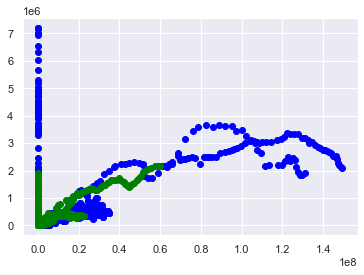

In [8]:
from sklearn.cluster import AgglomerativeClustering

#Create a dataframe with only the numeric featues
featuresWithData = [
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
]
featuresWithoutData = [
    'country',
    'iso_code',
    'vaccines',
    'source_name',
    'source_website'
]
dfNumbers = df.drop(columns=featuresWithoutData)
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean').fit(dfNumbers)

labels = clustering.labels_
frame = pd.DataFrame(dfNumbers)
frame['cluster']=labels
frame.columns = featuresWithData + ['cluster']

#Plot clustering
color = ['blue','green','cyan','black']
for k in range(2):
    data = frame[frame['cluster']==k]
    plt.scatter(data["people_vaccinated"], data["daily_vaccinations"], c=color[k])
plt.show()


# K-Means Clustering

KMeans(init='random', n_clusters=2, random_state=42)
[1 1 1 ... 1 1 1]
[[1.04337215e+08 4.91565541e+07]
 [1.20698794e+06 3.92081374e+05]]


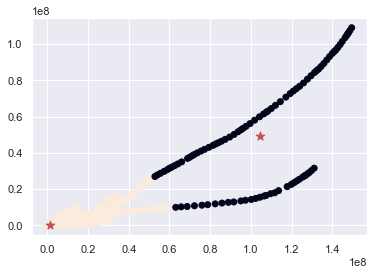

In [9]:
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where

dropDupdf = df
dropDupdf.drop_duplicates(inplace=True)
people_vacc = dropDupdf['people_vaccinated']
fully_vacc = dropDupdf['people_fully_vaccinated']

x2 = np.array(people_vacc).reshape(-1,1)
feats = [people_vacc, fully_vacc]
feats = np.array(feats)
feats = feats.T

#KMeans
KMeansClustering = KMeans(init = "random",n_clusters=2, n_init=10, random_state =42)
KMeansClustering.fit(feats)

plt.show()

print(KMeansClustering)
yhat = KMeansClustering.predict(feats)
print(yhat)
labels = KMeansClustering.labels_
clusters = KMeansClustering.cluster_centers_
print(clusters)

#clustering
plt.scatter(feats[:,0], feats[:,1], c=labels)
plt.scatter(clusters[:,0],clusters[:,1],marker='*',color='r',s=80)
    
plt.show()

# Mini Batch K-Means Clustering

MiniBatchKMeans(init='random', n_clusters=2, n_init=10, random_state=42)
[1 1 1 ... 1 1 1]
[[51990227.55503511 21579650.46838408]
 [  854781.63817126   291226.69069097]]


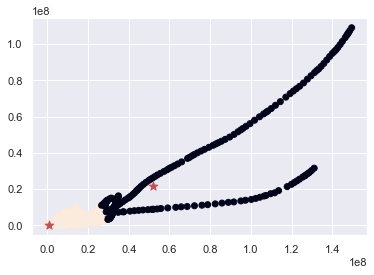

In [10]:
from sklearn.cluster import MiniBatchKMeans
from numpy import unique
from numpy import where

dropDupdf = df
dropDupdf.drop_duplicates(inplace=True)
people_vacc = dropDupdf['people_vaccinated']
fully_vacc = dropDupdf['people_fully_vaccinated']

x2 = np.array(people_vacc).reshape(-1,1)
feats = [people_vacc, fully_vacc]
feats = np.array(feats)
feats = feats.T
#Mini Batch K-Means
mbk2 = MiniBatchKMeans(init = "random",n_clusters=2, n_init=10, random_state =42)
mbk2.fit(feats)

plt.show()

print(mbk2)
yhat = mbk2.predict(feats)
print(yhat)
labels = mbk2.labels_
clusters = mbk2.cluster_centers_
print(clusters)
#Clustering
plt.scatter(feats[:,0], feats[:,1], c=labels)
plt.scatter(clusters[:,0],clusters[:,1],marker='*',color='r',s=80)
    
plt.show()

# Mean Shift Clustering

(15666,)
MeanShift(bandwidth=0.9)


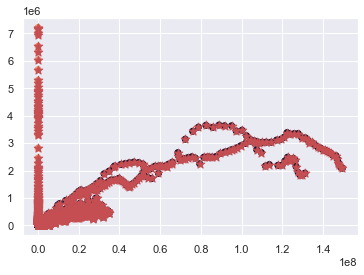

In [11]:
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot

people_vacc = df['people_vaccinated']
daily_vacc = df['daily_vaccinations']

x2 = np.array(people_vacc).reshape(-1,1)
features = [people_vacc, daily_vacc]
features = np.array(features)
features = features.T


fully_vacc = df['people_fully_vaccinated_per_hundred']
over_under = []
for data in fully_vacc:
    if data >= 10:
        over_under.append(0)
    else:
        over_under.append(1)
        
#target 
dataframe_copy2 = df
dataframe_copy2['halfway'] = over_under
y = dataframe_copy2['halfway']
print(y.shape)
#X,_ = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0, n_clusters_per_class=1,random_state=4)

mshclust = MeanShift(bandwidth=0.9).fit(features)
print(mshclust)
MeanShift(bandwidth=2,bin_seeding=False,cluster_all=True,min_bin_freq=1,n_jobs=1,seeds=None)
labels = mshclust.labels_
centers = mshclust.cluster_centers_

plt.scatter(features[:,0], features[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='r',s=80)
plt.show()

# Logistic Regression

(11749, 2)
(11749,)


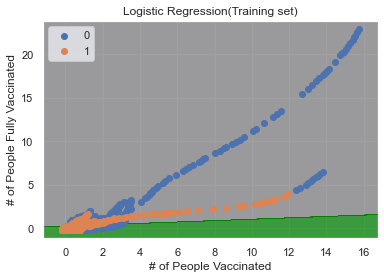

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

people_vacc = df['people_vaccinated']
fully_vacc = df['people_fully_vaccinated']

feats = [people_vacc, fully_vacc]
feats = np.array(feats)
feats = feats.T

fully_vacc = df['total_vaccinations_per_hundred']
over_under = []
for data in fully_vacc:
    if data >= 10:
        over_under.append(0)
    else:
        over_under.append(1)

dataframe_copy = df
dataframe_copy['halfway'] = over_under
y = dataframe_copy['halfway']

x_train, x_test, y_train, y_test = train_test_split(feats,y,test_size = 0.25, random_state=0)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step =0.01),
                   np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step =0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap= ListedColormap(('gray', 'green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
print(x_set.shape)
y_set = np.squeeze(y_set)
print(y_set.shape)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
                label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('# of People Vaccinated')
plt.ylabel('# of People Fully Vaccinated')
plt.legend()
plt.show()

# K-Nearest-Neighbors

[[ 138  112]
 [ 100 3567]]
(11749, 2)
(11749,)


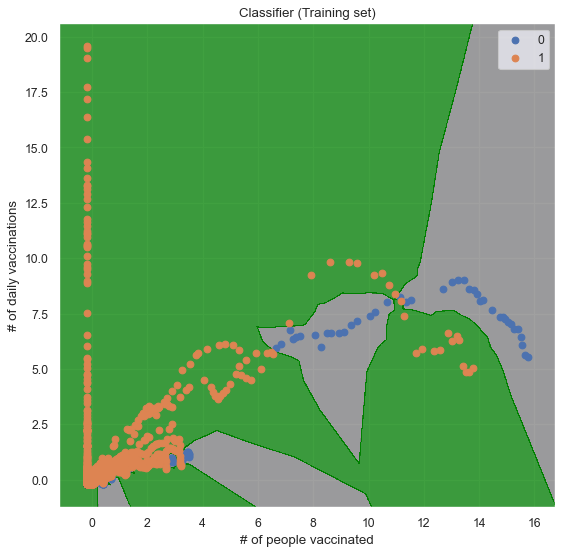

In [13]:
#TODO for part 4
#2 features and a target 
#people vaccinated & daily_vaccinations
#people fully vaccinated per 100 

people_vacc = df['people_vaccinated']
daily_vacc = df['daily_vaccinations']

features = [people_vacc, daily_vacc]
features = np.array(features)
features = features.T

fully_vacc = df['people_fully_vaccinated_per_hundred']
over_under = []
for data in fully_vacc:
    if data >= 10:
        over_under.append(0)
    else:
        over_under.append(1)
        
#target 
dataframe_copy = df
dataframe_copy['halfway'] = over_under
y = dataframe_copy['halfway']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize=(8, 8), dpi=80)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gray', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
print(X_set.shape)
print(y_set.shape)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                label = j)
plt.title('Classifier (Training set)')
plt.xlabel('# of people vaccinated')
plt.ylabel('# of daily vaccinations')
plt.legend()
plt.show()



# ########################################################
# # Import LabelEncoder
# from sklearn import preprocessing
# #creating labelEncoder
# le = preprocessing.LabelEncoder()
# # Converting string labels into numbers.
# people_encoded=le.fit_transform(people_vacc)


# # converting string labels into numbers
# daily_encoded=le.fit_transform(daily_vacc)
# label=le.fit_transform(halfway)


# #combining people and daily into single list of tuples
# features=list(zip(people_encoded,daily_encoded))


# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)

# # Train the model using the training sets
# model.fit(features,label)

# #Predict Output
# predicted= model.predict([[10000,5000]]) # 100,000: # of people vaccinated, 5000: # of daily vaccinations
# print(predicted)
# #########################################################
    

# Decision Tree 

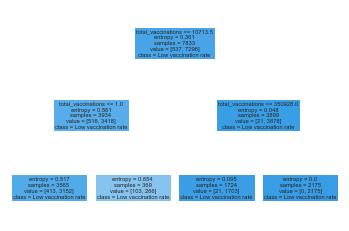

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dfNumbers2 = dfNumbers
X = [
    dfNumbers2["people_fully_vaccinated_per_hundred"],
    dfNumbers2['people_vaccinated']
]
X = np.array(X)
x = X.T
dfNumbers2.columns = featuresWithData + ["High vaccination rate"]
highRateThreshold = 100
rateData = []

#Fill new classification column
for data in dfNumbers2['daily_vaccinations']:
    if data >= highRateThreshold:
        rateData.append(1)
    else:
        rateData.append(0)
dfNumbers2["High vaccination rate"] = rateData
y = dfNumbers2["High vaccination rate"]

#Split the data into a train and test set.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50)

#Create and fit the classification
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf.fit(X_train, y_train)
fig = plt.figure()
_ = tree.plot_tree(tree_clf, feature_names=dfNumbers2.columns, class_names=["High vaccination rate", "Low vaccination rate"], filled=True)
plt.show()


# Discussion

Overall, we believe that the K Nearest Neighbors classification worked the best. With KNN, the classification is more specific because it is not limited to just classifying different classes with only one curve like the logistic regression. KNN also takes into account the distances between different data points which allows it to give more weight to certain data than others unlike the decision tree. And finally visually, the KNN classification looks as if it works very well visually as it seems to get all of the '1' (under 10% vaccinated) correctly classified. 